In [21]:
import sys
import os
import time
sys.path.insert(1, '../../../../')
# %matplotlib
# %matplotlib inline
import numpy
import matplotlib.pyplot as plt
import math
import random
import gillespy2

In [22]:
class ExampleDecayModel(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Automatic Switch Example")
            
            #parameters
            k1 = gillespy2.Parameter(name='k1', expression= .8)
            self.add_parameter([k1])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=100000)
            self.add_species([A])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1}, products={},
                   rate=k1)

            self.add_reaction([r1])
            self.timespan(numpy.linspace(0,10,101))

In [23]:
model = ExampleDecayModel()

In [24]:
ODE = model.get_best_solver_algo("ODE")(model)

start = time.perf_counter()
for i in range(100):
    ode_results = model.run(solver = ODE)
end = time.perf_counter()
ode_avg = (end - start) / 100

TauHybrid = model.get_best_solver_algo("Tau-Hybrid")(model)

start = time.perf_counter()
for i in range(100):
    hybrid_results = model.run(solver = TauHybrid)
end = time.perf_counter() 
hybrid_avg = (end - start) / 100

SSA = model.get_best_solver_algo("SSA")(model)

start = time.perf_counter()
for i in range(100):
    ssa_results = model.run(solver = SSA)
end = time.perf_counter() 
ssa_avg = (end - start) / 100

In [25]:
print(ode_avg)
print(hybrid_avg)
print(ssa_avg)

0.016348818999977085
0.02297674499990535
0.026069980000029316


In [26]:
print('*** ODE ***')
%time ode_results = model.run(algorithm = "ODE")
print('*** HYBRID ***')
%time hybrid_results = model.run(algorithm = "Tau-Hybrid")
print('*** SSA ***')
%time ssa_results = model.run(algorithm = "SSA")

*** ODE ***
Wall time: 8.13 s
*** HYBRID ***
Wall time: 13 s
*** SSA ***
Wall time: 3.21 s


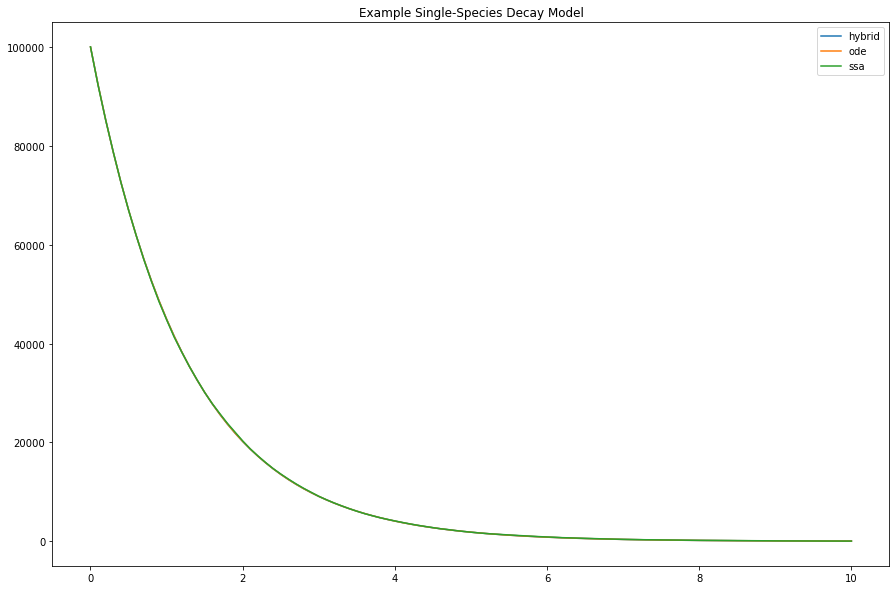

In [27]:
plt.figure(figsize=(15, 10))
start_slice = 9
end_slice = 11
for species in hybrid_results[0]:
    if species == 'time': continue
    plt.plot(hybrid_results[0]['time'], hybrid_results[0][species], label='hybrid')
for species in ode_results[0]:
    if species == 'time': continue
    plt.plot(ode_results[0]['time'], ode_results[0][species], label='ode')
for species in ssa_results[0]:
    if species == 'time': continue
    plt.plot(ssa_results[0]['time'], ssa_results[0][species], label='ssa')
plt.title('Example Single-Species Decay Model')
plt.legend(loc='best')
# hyb_solv_check_plot = plt.gcf()
# py.iplot_mpl(hyb_solv_check_plot, resize=False, filename='hyb_solv_check_plot', width=960, height=1120)

In [28]:
t = 10
print('at ', t, '% through simulation')
print('ODE: {0:20}'.format(ode_results[0]['A'][t]))
print('Hybrid: {0:10}'.format(hybrid_results[0]['A'][t]))
print('SSA: {0:10}'.format(ssa_results[0]['A'][t]))

at  10 % through simulation
ODE:              44935.0
Hybrid:    44932.9
SSA:    44815.0


In [29]:
t = 90
print('at ', t, '% through simulation')
print('ODE: {:-10.4}'.format(ode_results[0]['A'][t]))
print('Hybrid: {:-4}'.format(hybrid_results[0]['A'][t]))
print('SSA: {:-9}'.format(ssa_results[0]['A'][t]))

at  90 % through simulation
ODE:      74.73
Hybrid: 74.6581
SSA:      76.0


<BarContainer object of 3 artists>

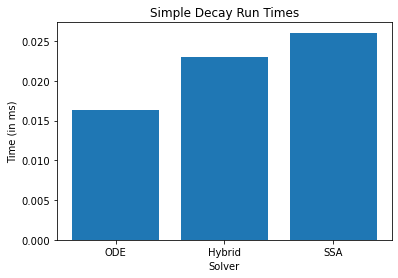

In [30]:
x = ['ODE', 'Hybrid', 'SSA']
runtimes = [ode_avg, hybrid_avg, ssa_avg]
plt.xlabel('Solver')
plt.ylabel('Time (in ms)')
plt.title('Simple Decay Run Times')
plt.bar(x, runtimes)